Just Exploring

In [1]:
from skidl.pyspice import *
#can you say cheeky 
import PySpice as pspice
#becouse it's written by a kiwi you know
import lcapy as kiwi

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sym


from IPython.display import YouTubeVideo, display

import traceback
import warnings

In [2]:
from DC_1_Codes import get_skidl_spice_ref
from AC_2_Codes import *

sym.init_printing()

#notebook specific loading control statements 
%matplotlib inline
#tool to log notebook internals
#https://github.com/jrjohansson/version_information
%load_ext version_information
%version_information skidl, PySpice,lcapy, sympy, numpy, matplotlib, pandas, scipy

Software,Version
Python,3.7.6 64bit [GCC 7.3.0]
IPython,7.12.0
OS,Linux 4.19.104 microsoft standard x86_64 with debian bullseye sid
skidl,0.0.31.dev0
PySpice,1.4.3
lcapy,0.75.dev0
sympy,1.6.2
numpy,1.18.1
matplotlib,3.3.0
pandas,1.1.4


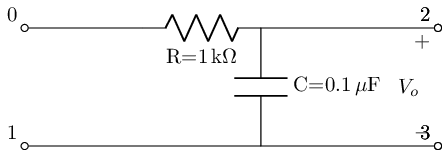

In [3]:
#instatate the rc_lowpass filter to 
lowpassF=rc_lowpass(C_value=.1@u_uF, R_value=1@u_kOhm)
lowpassF.lcapy_self()

In [4]:
reset()
#create the nets
net_in=Net('In'); net_out=Net('Out'); 

#create a 1V AC test source and attache to nets
vs=SINEV( ac_magnitude=1@u_V); vs['p', 'n']+=net_in, gnd

#attaceh term_0 to net_in and term_2 to net_out per scikit-rf convention all 
#other terminals are grounded
lowpassF.SKiDl(net_in, gnd, net_out, gnd)

circ=generate_netlist()
print(circ)


.title 
C1 Out 0 0.1uF
R1 In Out 1kOhm
V1 In 0 DC 0V AC 1V 0.0rad SIN(0V 1V 50Hz 0s 0Hz)




No errors or warnings found during netlist generation.



In [5]:
sim=circ.simulator()

In [6]:
res=sim.ac_sensitivity('V(Out)', 'lin', 10, 1@u_Hz, 10@u_MHz)

In [7]:
res.elements

AttributeError: 'NoneType' object has no attribute 'elements'

In [18]:
res=sim.dc_sensitivity('V(Out)')

In [19]:
res.branches

In [20]:
res.elements

{'v1': WaveForm v1 [1.]@V,
 'r1_scale': WaveForm r1_scale [-0.]@V,
 'r1_bv_max': WaveForm r1_bv_max [-0.]@V,
 'r1_m': WaveForm r1_m [-0.]@V,
 'r1_w': WaveForm r1_w [-0.]@V,
 'r1_l': WaveForm r1_l [-0.]@V,
 'r1': WaveForm r1 [-0.]@V,
 'r1:ef': WaveForm r1:ef [-0.]@V,
 'r1:wf': WaveForm r1:wf [-0.]@V,
 'r1:lf': WaveForm r1:lf [-0.]@V,
 'r1:bv_max': WaveForm r1:bv_max [-0.]@V,
 'c1_scale': WaveForm c1_scale [-0.]@V,
 'c1_bv_max': WaveForm c1_bv_max [-0.]@V,
 'c1_m': WaveForm c1_m [-0.]@V,
 'c1:bv_max': WaveForm c1:bv_max [-0.]@V}

In [21]:
res.internal_parameters

In [22]:
res.nodes